## Import libs

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## Import data

In [2]:
Cr_card=pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")

# 2. Data Exploration

### Description

In [3]:
Cr_card.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [4]:
Cr_card.shape

(284807, 31)

In [5]:
Cr_card.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Imbalance in the data

In [6]:
fraud = Cr_card[Cr_card['Class'] == 1] 
valid = Cr_card[Cr_card['Class'] == 0] 
outlierFraction = len(fraud)/float(len(valid)) 
print(outlierFraction) 
print('Fraud Cases: {}'.format(len(Cr_card[Cr_card['Class'] == 1]))) 
print('Valid Transactions: {}'.format(len(Cr_card[Cr_card['Class'] == 0])))

0.0017304750013189597
Fraud Cases: 492
Valid Transactions: 284315


So we have highly Unbalanced data, Only 0.17% fraudulent transaction out all the transactions.

### Check missing data

In [7]:
total = Cr_card.isnull().sum().sort_values(ascending = False)
percent = (Cr_card.isnull().sum()/Cr_card.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,Class,V14,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Time
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


There is no messing data

# 3. Data preprocessing

we will scale our data using the scale() function. We will apply this to the amount component of our creditcard_data amount.

In [8]:
Cr_card.Amount= preprocessing.scale(Cr_card.Amount)

In [9]:
Cr_card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [10]:
# dividing the X and the Y from the dataset 
x = Cr_card.drop(['Class'], axis = 1) 
y= Cr_card["Class"] 

we will split our dataset into training set as well as test set with a split ratio of 0.80. This means that 80% of our data will be attributed to the train_data whereas 20% will be attributed to the test data.

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 42)

In [12]:
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(227845, 30) (56962, 30)
(227845,) (56962,)


### Handle Imbalanced Data

we will implement "Undersampling" which basically consists of removing data in order to have a more balanced dataset

In [13]:
#1. Find the number of the minority class
number_fraud = len(Cr_card[Cr_card['Class']==1])

In [14]:
number_non_fraud = len(Cr_card[Cr_card['Class']==0])

In [15]:
#2. Find the indices of the majority class
index_non_fraud = Cr_card[Cr_card['Class']==0].index

In [16]:
#.3 Find the indices of the minority class
index_fraud = Cr_card[Cr_card['Class']==1].index

In [17]:
#4. Randomly sample the majority indices with respect to the number of minority classes
random_indices = np.random.choice(index_non_fraud, number_fraud,replace='False')

In [18]:

len(random_indices)

492

In [19]:
#5. Concat the minority indices with the indices from step 4
under_sample_indices = np.concatenate([index_fraud,random_indices])

In [20]:

#Get the balanced dataframe - This is the final undersampled data
under_sample_df = Cr_card.iloc[under_sample_indices]

In [21]:
under_sample_df.shape

(984, 31)

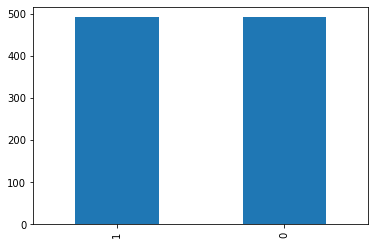

In [22]:
under_sample_class_counts = pd.value_counts(under_sample_df['Class'])
under_sample_class_counts.plot(kind='bar')

Now we have balanced data, so we can go further with our analysis and data preprocessing.

# 4. Data Modeling

In [23]:
# dividing the X and the Y from the dataset 
X = under_sample_df .drop(['Class'], axis = 1) 
Y= under_sample_df ["Class"] 

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state = 42)

In [25]:
print(X_train.shape, X_test.shape)

(787, 30) (197, 30)


In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier 
# random forest model creation 
rfc = RandomForestClassifier() 
scores = cross_val_score(rfc, X_train, Y_train, cv=5)

In [27]:
print(scores)

[0.93037975 0.96202532 0.94904459 0.92356688 0.91082803]


In [28]:
rfc.fit(X_train, Y_train)
# predictions 
yPred = rfc.predict(X_test) 

In [29]:
rfc_accuracy = accuracy_score(yPred, Y_test)
rfc_recall = recall_score(yPred, Y_test)
print(rfc_accuracy)
print(rfc_recall)

0.949238578680203
0.978494623655914


We can see that the recall is 98%, which is a great number. We can say that our model is correctly classifying data as 'fraudulent' with 98% accuracy. However, we see that accuracy is lesser than recall. This is normal, as we have undersampled our data.

Confusion matrix:
 [[96  2]
 [ 8 91]]




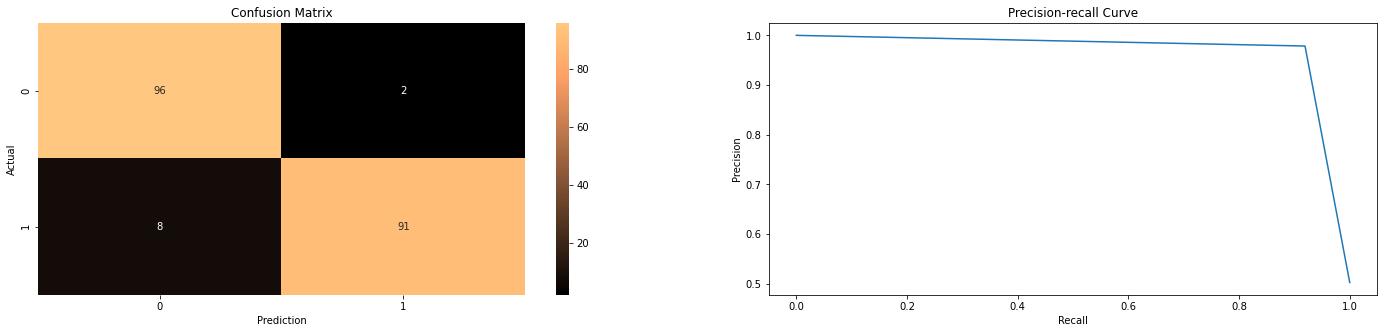

In [30]:
cm = confusion_matrix(Y_test, yPred)
print ("Confusion matrix:\n", cm)
print ("\n")

fig, ax = plt.subplots(1, 2, figsize=(24,5))

# annot: If True, write the data value in each cell
sns.heatmap(cm, ax=ax[0], annot=True, cmap=plt.cm.copper)
ax[0].set_title("Confusion Matrix")
ax[0].set_xlabel("Prediction")
ax[0].set_ylabel("Actual")

precision, recall, _ = precision_recall_curve(Y_test, yPred)
ax[1].plot(recall, precision)
ax[1].set_title("Precision-recall Curve")
ax[1].set_xlabel("Recall")
ax[1].set_ylabel("Precision")
plt.show()